# Mass Excess Visualized

In [1]:
import pynucastro as pyna

First we'll get all nuclei with known masses and look at the binding energy

In [2]:
nuclei = pyna.get_all_nuclei()

We want to visualize the mass excess and binding energy in the $Z$-$N$ plane.
First let's get the extent of $N$ and $Z$ in our nucleus list.

In [3]:
max_Z = max(nuclei, key=lambda n : n.Z).Z
max_N = max(nuclei, key=lambda n : n.N).N

and the maximum absolute value of the mass excess (in MeV)

In [4]:
dm_mag = abs(max(nuclei, key=lambda n: abs(n.dm)).dm)
dm_mag

201.37

Now we'll create an array to store dm(Z, N) and be(Z, N) and loop over all the nuclei and store each mass excess and binding energy / nucleon.

In [5]:
import numpy as np
dm = np.zeros((max_Z+1, max_N+1))
be = np.zeros((max_Z+1, max_N+1))

We'll initialize these to NaN so we can mask out the regions where there are no nuclei

In [6]:
dm[:,:] = np.nan
be[:,:] = np.nan

In [7]:
for n in nuclei:
    dm[n.Z, n.N] = n.dm
    be[n.Z, n.N] = n.nucbind

```{note}
Due to mass excess estimation in the nuclear databases, a few nuclei have negative binding energies.
```

In [8]:
n = [n for n in nuclei if n.nucbind < 0]
n

[Li3, B6]

Finally, we can plot

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

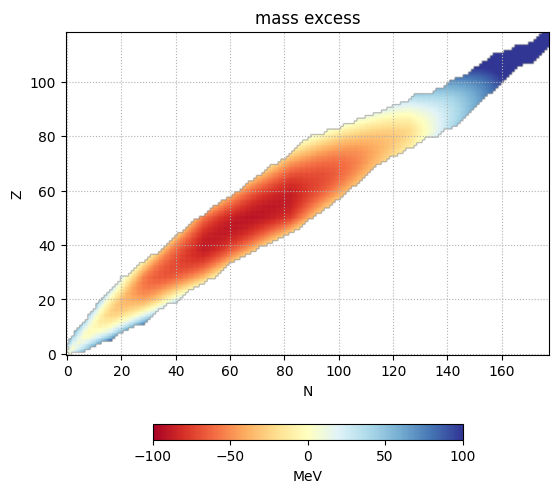

In [10]:
# mask out the regions with no nuclei
cmap = mpl.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
ax.grid(ls=":")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5, label="MeV")
fig.set_size_inches(8, 6)